<a href="https://colab.research.google.com/github/MargauxCNH/2024_Intro_Python/blob/main/Exercise1_W2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Exercise) Ocean Floats Data Analysis

**Learning Objectives**

*    Creating new arrays using `linspace` and `arange`
*    Computing basic formulas with `numpy` arrays
*    Loading data from `.npy` files
*    Performing reductions (e.g. `mean`, `std` on `numpy` arrays)
*    Making 1D line plots
*    Making scatterplots
*    Annotating plots with titles and axes

In this problem, we use real data from ocean profiling floats. [ARGO](http://www.argo.ucsd.edu/) floats are autonomous robotic instruments that collect Temperature, Salinity, and Pressure data from the ocean. [ARGO](http://www.argo.ucsd.edu/) floats collect one “profile” (a set of messurements at different depths or “levels”).

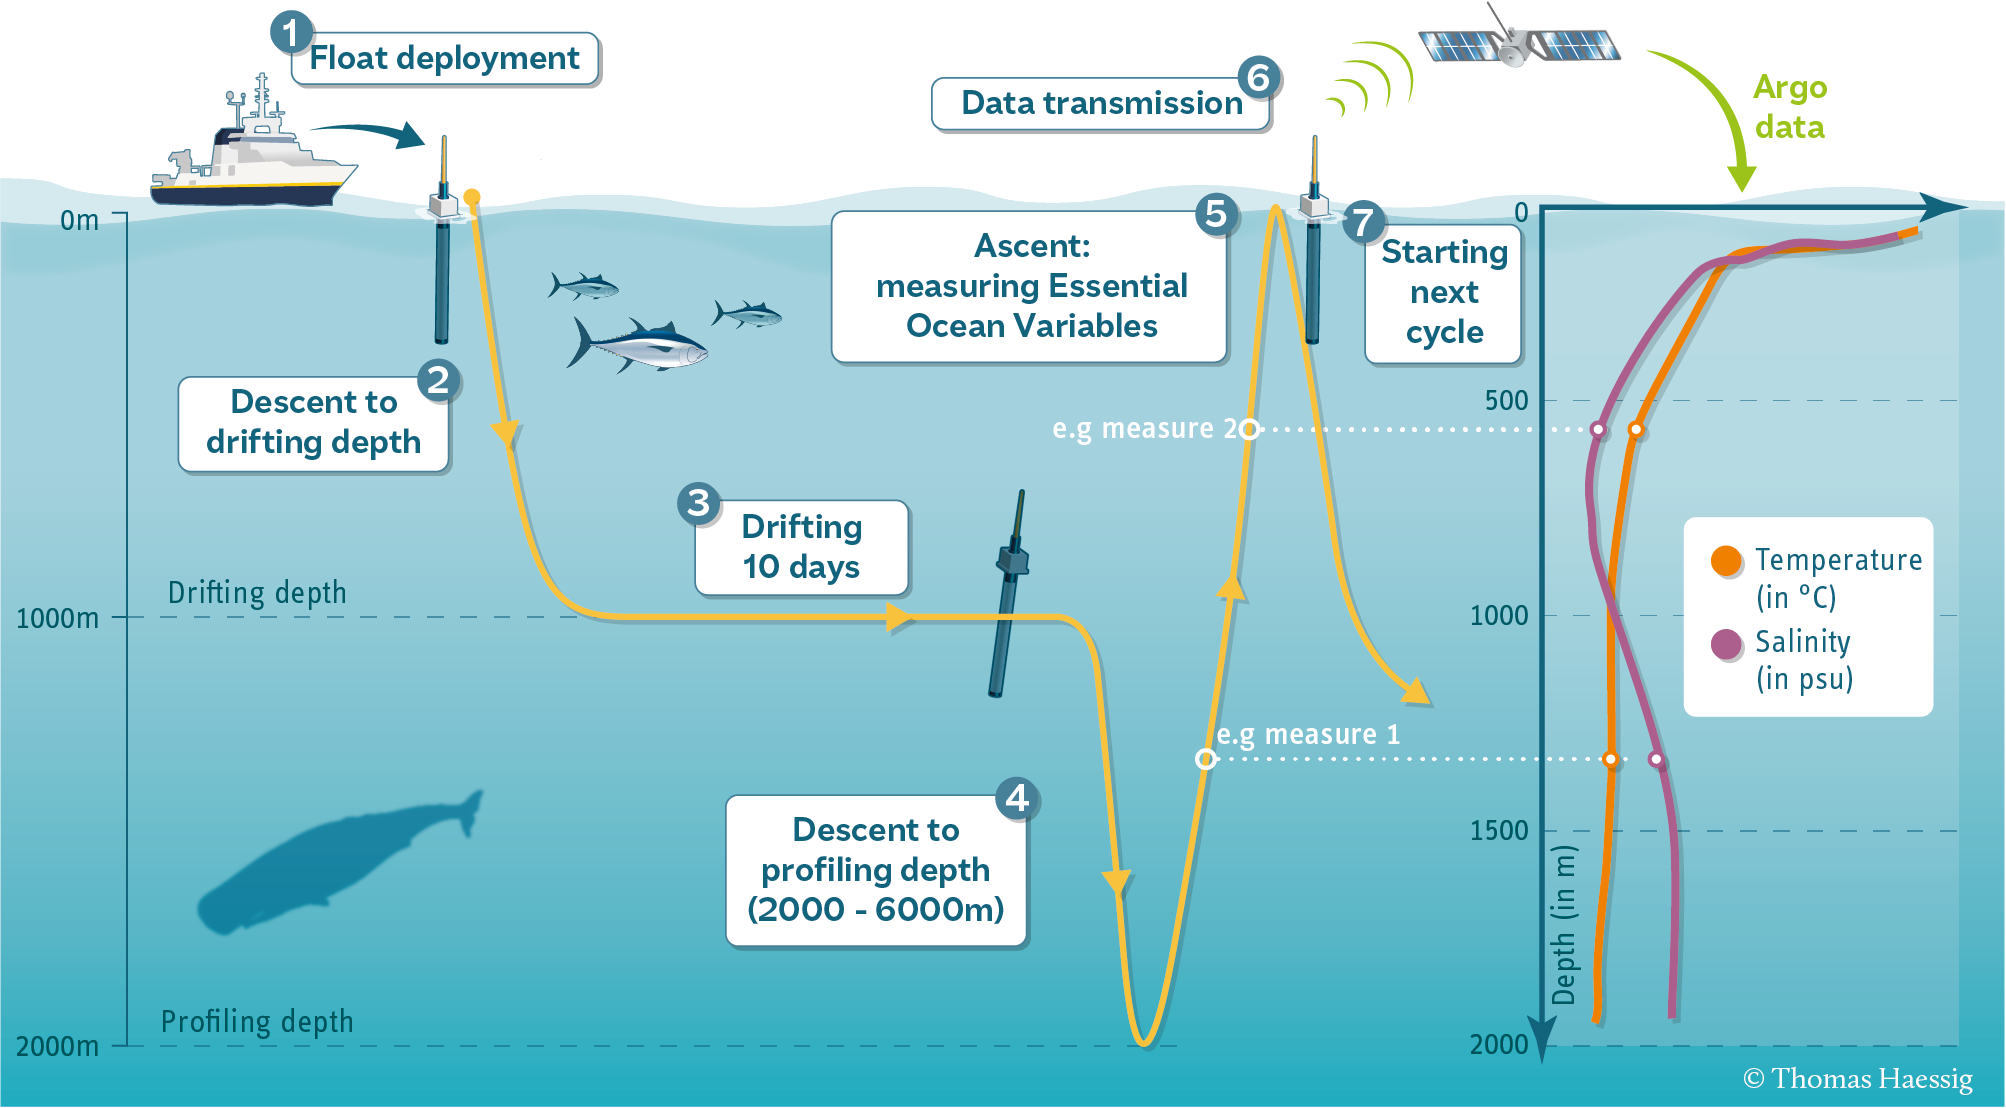


Each profile has a single latitude, longitude, and date associated with it, in addition to many different levels.

Let’s start by using [pooch](https://www.fatiando.org/pooch/latest/) to download the data files we need for this exercise. The following code will give you a list of `.npy` files that you can open in the next step.

In [4]:
import pooch

url = "https://unils-my.sharepoint.com/:u:/g/personal/tom_beucler_unil_ch/EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ?download=1"
files = pooch.retrieve(url, processor=pooch.Unzip(), known_hash='2a703c720302c682f1662181d329c9f22f9f10e1539dc2d6082160a469165009')
files

Unzipping contents of '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ' to '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip'


['/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy',
 '/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy']

In [5]:
import numpy as np

**Q1) Load each data file as a `numpy` array.**

You can use whatever names you want for your arrays, but we recommend:

`T`: temperature

`S`: salinity

`P`: pressure

`date`: date

`lat`: latitude

`lon`: longitude

`level`: depth level

Hint 1: Look at the file name (the items in `files`) to know which files corresponds to which variable.

Hint 2: Check out the documentation for [`np.load`](https://numpy.org/doc/stable/reference/generated/numpy.load.html).

Display the names of the items in files here

In [9]:
print(files [0])
print(files [1])
print(files [2])
print(files [3])
print(files [4])
print(files [5])
print(files [6])

/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy


In [57]:
print(*files, sep="\n")

/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/S.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lon.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/date.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/levels.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/P.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/lat.npy
/root/.cache/pooch/4e2111f8c8dc35a2e2c0f9ec759ecb61-EZwbaBqass1LhZO3DS3BCL0BhIlcENuoDItMB9b4IYDUCQ.unzip/float_data/T.npy


*Then*, load the files as `numpy` arrays, for instance using list comprehension

In [58]:
S, lon, date, levels, P, lat, T = [np.load(files[i]) for i in range(7)]

**Q2) Recreate the `level` array using `np.arange` and `np.linspace`**

Hints:

*   The documentation for `np.arange` is [at this link](https://numpy.org/devdocs/reference/generated/numpy.arange.html)
*   The documentation for `np.linspace` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html)
*   The documentation for `np.testing.assert_equal` is [at this link](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_equal.html)

Display the `level` array

In [12]:
print(levels)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]


Recreate the `level` array using `np.arange` and call it `level_arange`

In [49]:
level_arange = np.linspace(0, 77, 78)


In [50]:
print(f"Shape of levels: {levels.shape}")
print(f"Levels: {levels}")
print(f"Shape of level_arange: {level_arange.shape}")
print(f"level_arange: {level_arange}")

Shape of levels: (78,)
Levels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77]
Shape of level_arange: (78,)
level_arange: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77.]


In [51]:
np.testing.assert_equal(levels, level_arange)

Check that `level` and `level_arange` are equal using `np.testing.assert_equal`

In [21]:
np.testing.assert_equal(levels, level_arange)

Recreate the `level` array using `np.linspace` and call it `level_linspace`

In [22]:
level_linspace = np.linspace(0,77,78)

Check that `level` and `level_linspace` are equal using `np.testing.assert_equal`

In [52]:
level_linspace = np.linspace(0,77,78)
levels = np.linspace(0, 77, 78)
np.testing.assert_equal(levels, level_linspace)

**Q3) Examine the shapes of `T`, `S` and `P` compared to `lon`, `lat`, `date` and `level`. How do you think they are related?**

Hint: Check out the [NDArrays subsection](#NDArrays)

Display the shapes of all loaded variables

In [61]:
print(f"T shape: {T.shape}")
print(f"S shape: {S.shape}")
print(f"P shape: {P.shape}")
print(f"lon shape: {lon.shape}")
print(f"lat shape: {lat.shape}")
print(f"date shape: {date.shape}")
print(f"level shape: {levels.shape}")

T shape: (78, 75)
S shape: (78, 75)
P shape: (78, 75)
lon shape: (75,)
lat shape: (75,)
date shape: (75,)
level shape: (78,)


Based on the shapes, which dimensions do you think are shared among the arrays?

**Q4) Based on the formula below, calculate the seawater density `relative_density`, relative to pure water, as a function of the temperature, the salinity, and the pressure.**

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

where:

*    The densities $\rho$ and $ρ_{Pure\ Water}$ are in units $kg/m^{3}$.
*    The constants $a$, $b$, and $c$ are provided below.
*    The function to calculate the conservative temperature $\Theta$ (in units Celcius) from temperature, salinity, and pressure is provided below.
*    The temperature $T$ is in units Celcius.
*    The salinity $S$ is in units $g/kg$.
*    The pressure $p$ is in units $dbar$.

Hint: The loaded `numpy` arrays `temperature`, `salinity`, and `pressure` already have the right units and no conversion is needed.

Sources:

1) [*Roquet, Fabien, et al. "Defining a simplified yet “realistic” equation of state for seawater." Journal of Physical Oceanography 45.10 (2015): 2564-2579.*](https://journals.ametsoc.org/view/journals/phoc/45/10/jpo-d-15-0080.1.xml)

2) [*The Gibbs SeaWater (GSW)
Oceanographic Toolbox of TEOS-10*](https://www.teos-10.org/pubs/gsw/html/gsw_front_page.html). [(License)](https://www.teos-10.org/pubs/gsw/html/gsw_licence.html)

Below are the constants a, b, and c:

In [62]:
a = 7.718e-1
b = -8.44e-2
c = -4.561e-3

Let's import the library [`gsw`](https://teos-10.github.io/GSW-Python/) that contains the function `CS_from_t`to calculate the conservative temperature $\Theta$ from temperature, salinity, and pressure.

In [63]:
!pip install gsw
from gsw import CT_from_t

Now it's all up to you. Here's the equation to avoid having to scroll back up:

`relative_density`$ = ρ −ρ_{Pure\ Water} = a \times S +b \times \Theta + c \times \Theta^{2}$

Calculate the conservative temperature

Hint: use [CT_from_t](https://www.teos-10.org/pubs/gsw/html/gsw_CT_from_t.html)

Calculate the `relative density` using the equation above

In [66]:
CT = CT_from_t(S, T, P)
print(CT)

[[18.95038389 18.41702486 19.07746816 ... 19.0838613  21.79604023
  20.10691816]
 [18.7167823  18.37902205 19.05973411 ... 18.44249588 19.43744461
  20.10022206]
 [18.34343364 18.3522886  19.04195407 ... 18.20006431 19.23615405
  20.05124564]
 ...
 [ 3.6359899   3.65662809  3.64478998 ...  3.64962307  3.65341962
   3.70166094]
 [ 3.60272526  3.61639726  3.59575608 ...  3.59259633  3.58470724
   3.6437391 ]
 [ 3.57826951  3.58028581  3.55956863 ...         nan  3.54839488
          nan]]


In [67]:
relative_density = ((a * S) +( b * CT) + (c * CT**2))

In [ ]:
___ = ___

**Q4) Make a plot for each column of data in `T`, `S`, `P`, and
`relative_density` (four plots)**

For this question, we have to use the [Pyplot interface](https://matplotlib.org/stable/tutorials/introductory/pyplot.html) of the [Matplotlib library](https://matplotlib.org/) for visualization even if we have not covered it extensively in class yet. But fear not as we provide easy-to-follow instructions below. 😊

The first step is to import Pyplot. Simply execute the code below.

In [56]:
import matplotlib.pyplot as plt

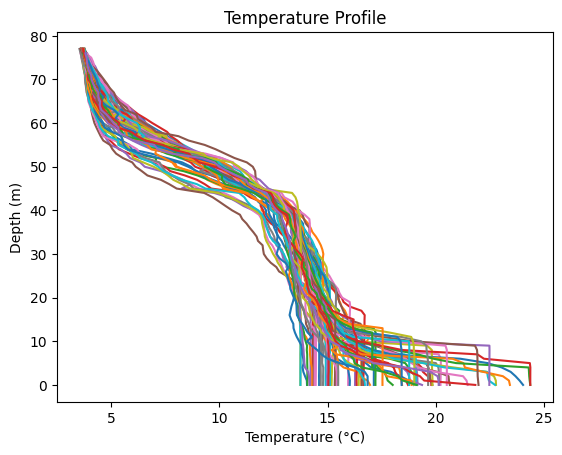

In [74]:
plt.figure()
plt.plot(T, levels)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature Profile')
plt.show()


#Make a graph in each cell, if not it will overwrite the one before.

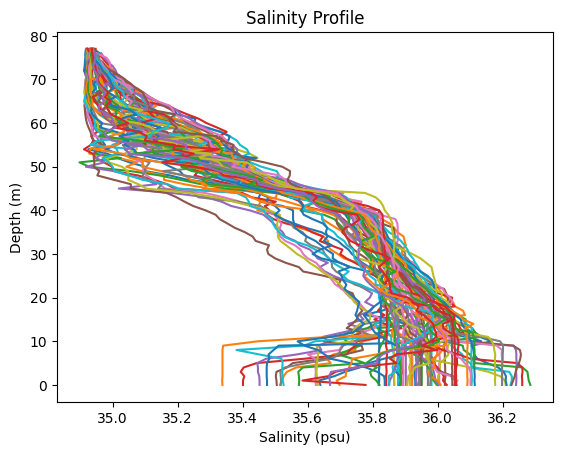

In [71]:
plt.figure()
plt.plot(S, levels)
plt.xlabel('Salinity (psu)')
plt.ylabel('Depth (m)')
plt.title('Salinity Profile')
plt.show()

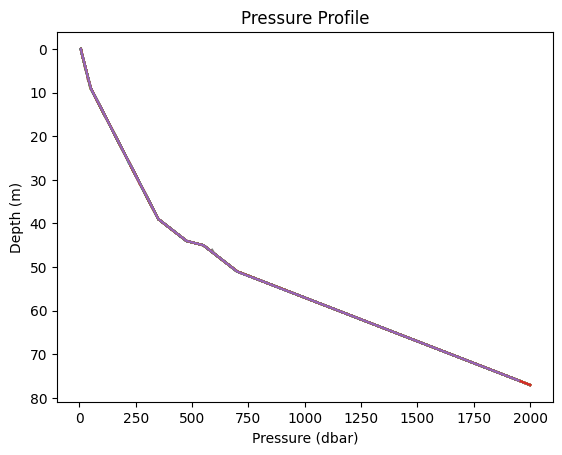

In [72]:
plt.figure()
plt.plot(P, levels)
plt.xlabel('Pressure (dbar)')
plt.ylabel('Depth (m)')
plt.title('Pressure Profile')
plt.gca().invert_yaxis()
plt.show()

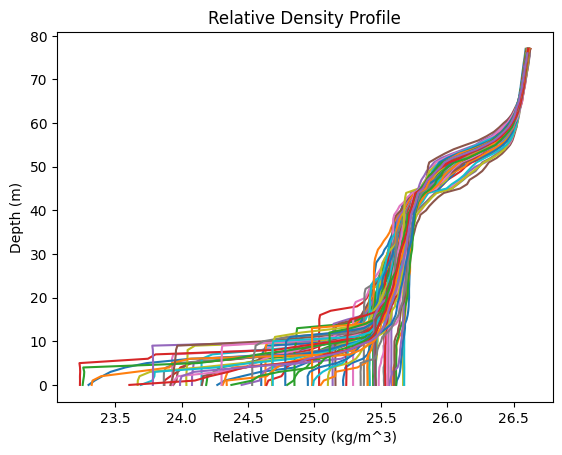

In [75]:
plt.figure()
plt.plot(relative_density, levels)
plt.xlabel('Relative Density (kg/m^3)')
plt.ylabel('Depth (m)')
plt.title('Relative Density Profile')
plt.show()

Then, we will plot variables as a function of the ocean depth, `level`. Simply read the documentation [at this link](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to infer the correct syntax. Label your axes using `plt.xlabel` and `plt.ylabel`, and add a title using `plt.title`.

Hint: The vertical scale should use the `level` data to be consistent with oceanographic conventions.

Hint 2: Each plot should have a line for each column of data. It will look messy, like the plot below:

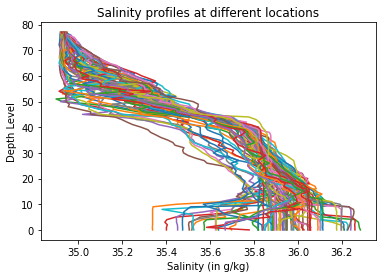

Make more plots below:

**Q5) Compute the mean and standard deviation of each of `T`, `S`, `P`, and `seawater_density` at each depth in `level`.**

Hint: You may want to read the documentation at [this link](https://numpy.org/doc/stable/reference/generated/numpy.mean.html) and [this link](https://numpy.org/doc/stable/reference/generated/numpy.std.html).

Hint 2: You can check that you took the mean and standard deviations along the correct axes by checking the `shape` of your results.

Compute the means...

In [82]:
np.mean(T, axis = 1)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 10.80430666, 10.49702667, 10.1749066 ,  9.83453334,
        9.48625332,  9.19793334,  8.66010666,  8.12324001,  7.60221333,
        7.15289333,  6.74250667,  6.39543999,  6.04598667,  5.74538665,
        5.48913333,  5.26604001,  5.08768   ,  4.93479998,  4.77769334,
        4.65368   ,  4.54237334,  4.44274664,  4.35933333,      

In [83]:
np.mean(S, axis = 1)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 35.41392634, 35.3810557 , 35.34845245, 35.31531555,
       35.28392568, 35.26568334, 35.2389473 , 35.21583745, 35.19686081,
       35.18231257, 35.1648436 , 35.15073542, 35.12509338, 35.10155869,
       35.08199799, 35.06317012, 35.0490097 , 35.03678253, 35.02174266,
       35.01135579, 35.00212936, 34.99386297, 34.98810328,      

In [84]:
np.mean(P, axis = 1)

array([   6.43466671,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,           nan,           nan,
                 nan,           nan,  575.68400146,  600.42400716,
        625.30800456,  650.34533773,  675.33333984,  700.37067546,
        750.42400716,  800.36666992,  850.38534017,  900.4613387 ,
        950.45067383, 1000.38534261, 1050.38534668, 1100.45734

In [86]:
np.mean(relative_density, axis = 1)

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan, 25.90086615, 25.93076294, 25.96266297, 25.99633694,
       26.03175294, 26.06651762, 26.13495917, 26.20371829, 26.27052919,
       26.3278476 , 26.37530871, 26.41480354, 26.44470169, 26.46826568,
       26.48821066, 26.50384344, 26.51677094, 26.52768415, 26.53668014,
       26.54491708, 26.55228621, 26.55881519, 26.56519787,      

In [87]:
np.std(T, axis = 1)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.84204226, 0.90031954, 0.94661515, 0.9902255 ,
       1.01786435, 1.01690775, 1.01944275, 0.97987767, 0.94359878,
       0.88207755, 0.82934499, 0.7859263 , 0.71755907, 0.68351183,
       0.64382025, 0.58990336, 0.55077313, 0.50187175, 0.45673872,
       0.4085324 , 0.36748504, 0.33272584, 0.2996815 ,        nan,
              nan,        nan,        nan,        nan,        

In [88]:
np.std(S, axis = 1)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.11644936, 0.12211051, 0.12341583, 0.12609271,
       0.12781264, 0.12486204, 0.12508305, 0.12873388, 0.1271157 ,
       0.12208639, 0.11848103, 0.11478619, 0.10416219, 0.1009587 ,
       0.09565639, 0.08961304, 0.0856126 , 0.07880695, 0.07300245,
       0.06582414, 0.05933736, 0.05371506, 0.04872476,        nan,
              nan,        nan,        nan,        nan,        

In [89]:
np.std(P, axis = 1)

array([0.8534625 ,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 1.5931604 , 0.28791041, 0.50431884, 0.3960767 ,
       0.58088542, 0.5878231 , 0.46728604, 0.38447582, 0.4927975 ,
       0.4390579 , 0.31427165, 0.28784061, 0.40978017, 0.39367447,
       0.26551312, 0.36947741, 0.61174401, 0.34210648, 0.43511937,
       0.33283111, 0.52793873, 0.55593409, 0.35726761,        nan,
              nan,        nan,        nan,        nan,        

In [90]:
np.std(relative_density, axis = 1)

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan, 0.06560189, 0.06954326, 0.07525136, 0.08012412,
       0.08297409, 0.08501657, 0.0849015 , 0.07918053, 0.06847191,
       0.05889347, 0.04711212, 0.03604723, 0.0282499 , 0.02338445,
       0.01821967, 0.01424514, 0.01090861, 0.00923819, 0.00845313,
       0.00774326, 0.00694736, 0.00663108, 0.00649737,        nan,
              nan,        nan,        nan,        nan,        

... and the standard deviations.

Check that they have the same shape as your vertical level `lev` coordinate:

*   List item
*   List item



In [99]:
np.testing.assert_equal(np.mean(T, axis=1).shape, levels.shape)

**Q6) Now make similar plots, but show only the mean `T`, `S`, `P`, and `seawater_density` at each depth. Show error bars on each plot using the standard deviations.**

Hint: If you are feeling adventurous, you can directly use the [`plt.errorbar`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.errorbar.html) function.

Hint 2: You should get plots similar to the one below

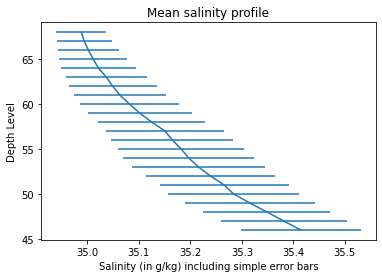

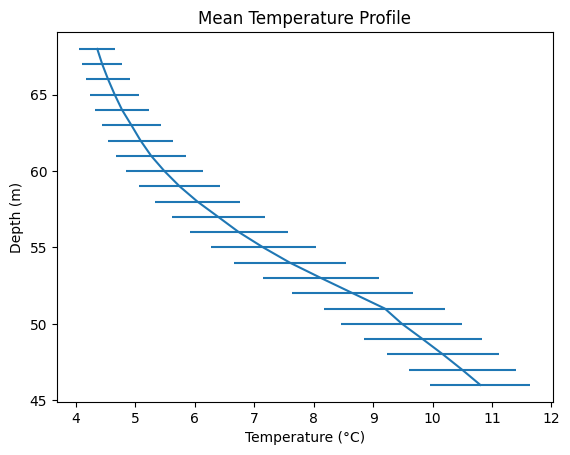

In [112]:
mean_T = np.mean(T, axis=1)
std_mean = np.std(T, axis=1)
plt.errorbar(mean_T, levels, xerr=std_mean)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Mean Temperature Profile')
plt.show()

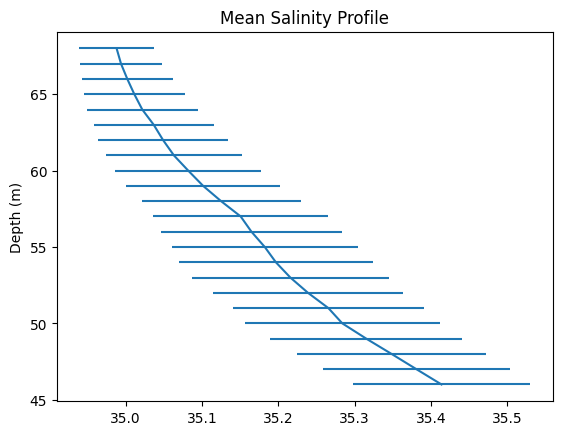

In [113]:
mean_S = np.mean(S, axis=1)
std_mean = np.std(S, axis=1)
plt.errorbar(mean_S, levels, xerr=std_mean)
plt.ylabel('Depth (m)')
plt.title('Mean Salinity Profile')
plt.show()

Text(0.5, 1.0, 'Mean Pressure Profile')

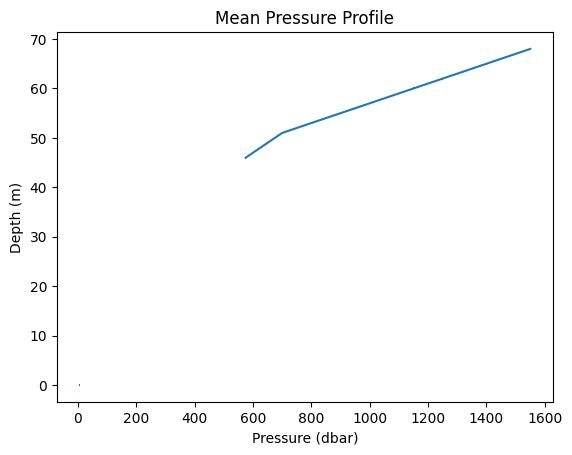

In [114]:
mean_P = np.mean(P, axis=1)
std_mean = np.std(P, axis=1)
plt.errorbar(mean_P, levels, xerr=std_mean)
plt.xlabel('Pressure (dbar)')
plt.ylabel('Depth (m)')
plt.title('Mean Pressure Profile')

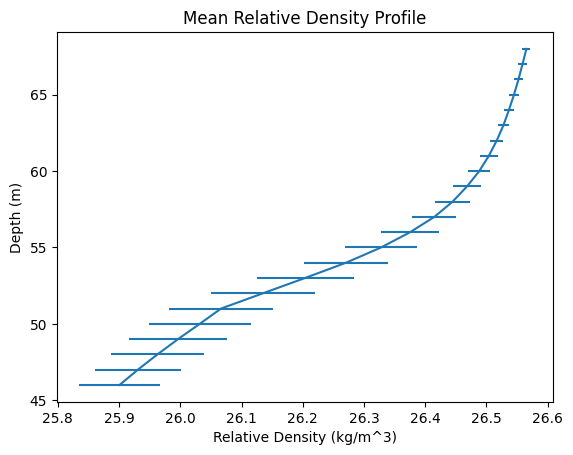

In [115]:
mean_relative_density = np.mean(relative_density, axis=1)
std_mean = np.std(relative_density, axis=1)
plt.errorbar(mean_relative_density, levels, xerr=std_mean)
plt.xlabel('Relative Density (kg/m^3)')
plt.ylabel('Depth (m)')
plt.title('Mean Relative Density Profile')
plt.show()

In [ ]:
plt.errorbar(___,___,xerr=___)
plt.xlabel(___)
plt.ylabel(___)
plt.title(___)

Three more plots and we'll be all set! 🙂

**Q7) Account For Missing Data**

The profiles contain many missing values. These are indicated by the special “Not a Number” value, or `np.nan`.

When you take the mean or standard deviation of data with NaNs in it, the entire result becomes `NaN`. Instead, if you use the special functions `np.nanmean` and `np.nanstd`, you tell NumPy to ignore the NaNs.

Recalculate the means and standard deviations as in the previous sections using these functions and plot the results.

Hint: Links to the [`np.nanmean` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanmean.html) and the [`np.nanstd` documentation](https://numpy.org/doc/stable/reference/generated/numpy.nanstd.html).

Recalculate the means below ignoring the missing values. We trust that you can now come up with the full syntax yourself 😎

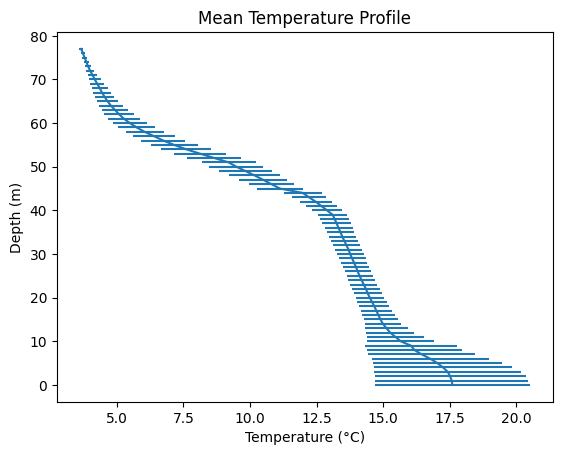

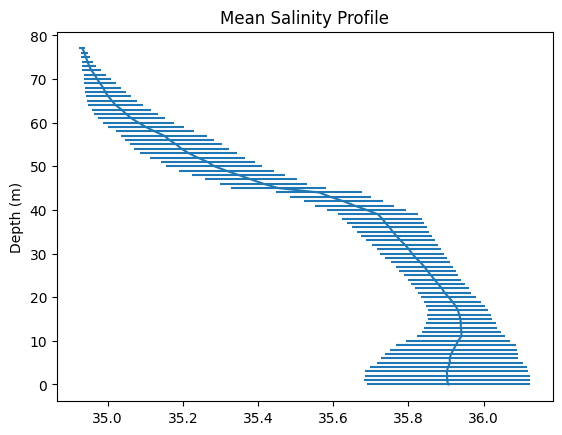

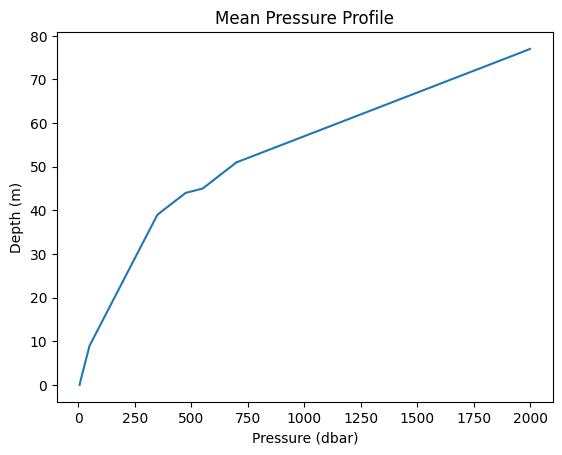

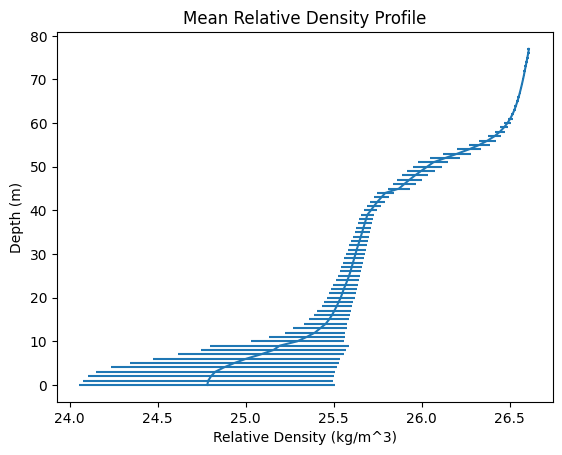

In [118]:
mean_T = np.nanmean(T, axis=1)
std_mean = np.nanstd(T, axis=1)
plt.errorbar(mean_T, levels, xerr=std_mean)
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Mean Temperature Profile')
plt.show()

mean_S = np.nanmean(S, axis=1)
std_mean = np.nanstd(S, axis=1)
plt.errorbar(mean_S, levels, xerr=std_mean)
plt.ylabel('Depth (m)')
plt.title('Mean Salinity Profile')
plt.show()

mean_P = np.nanmean(P, axis=1)
std_mean = np.nanstd(P, axis=1)
plt.errorbar(mean_P, levels, xerr=std_mean)
plt.xlabel('Pressure (dbar)')
plt.ylabel('Depth (m)')
plt.title('Mean Pressure Profile')
plt.show()

mean_relative_density = np.nanmean(relative_density, axis=1)
std_mean = np.nanstd(relative_density, axis=1)
plt.errorbar(mean_relative_density, levels, xerr=std_mean)
plt.xlabel('Relative Density (kg/m^3)')
plt.ylabel('Depth (m)')
plt.title('Mean Relative Density Profile')
plt.show()


[link text](https://)Similarly, recalculate the standard deviations ignoring the missing values.

In [119]:
std_mean_T = np.nanstd(T, axis=1)
std_mean_S = np.nanstd(S, axis=1)
std_mean_P = np.nanstd(P, axis=1)
std_mean_relative_density = np.nanstd(relative_density, axis=1)


**Q8) Create a scatter plot of the longitudinal (`lon`) and latitudinal (`lat`) coordinates of the ARGO floats.**

Again, we have not discussed it in the tutorial, but there is a really convenient scatter plot function called [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) provided by the Pyplot interface.

Bonus: Label your figure using `plt.xlabel`, `plt.ylabel`, and `plt.title`.

Bonus 2: Increase the fontsize of your labels by adding a `fontsize=` argument to the label functions.

Bonus 3: Make your scatter plot beautiful by changing the arguments of [`plt.scatter`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) listed in the documentation, for example `s=`.

In [ ]:
plt.scatter(___,___)
___ # Fancy bonuses
___ # More fancy bonuses